<a href="https://colab.research.google.com/github/SantivqzV/43/blob/master/actividades/A9_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A9 Regresion
Santiago Vázquez Villarreal

In [1]:
import pandas as pd

In [2]:
path = "https://raw.githubusercontent.com/SantivqzV/DataSets/main/antropometria-dataset.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


Escribe el código en Python para obtener un modelo de regresión lineal simple usando  'peso' como variable dependiente y 'cintura' como variable independiente.

Agrega el código en Python para imprimir los valores de la pendiente, la ordenada al origen (B0 o intercepto) y el coeficiente de regresión parcial (B1).

Escribe el código en Python para incluir la recta del modelo de regresión (valores estimados) junto con los datos originales (reales) en un diagrama de dispersión.

Escribe el código en Python para calcular los residuos.

Separa los datos entre hombres y mujeres y repite el análisis.

Al final agrega una celda en donde expliques tus conclusiones.

In [5]:
import seaborn as sns
from sklearn import linear_model

In [6]:
favs = ['sistol','diastol']
data.dropna(subset = favs, inplace=True)

y = pd.DataFrame(data['diastol'])
x = pd.DataFrame(data['sistol'])
lm = linear_model.LinearRegression()
model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [7]:
model_lm.intercept_


array([23.68430324])

In [8]:
model_lm.coef_


array([[0.43750849]])

In [9]:
model_lm.score(x,y)

0.44084402469011985

In [10]:
import statsmodels.api as sm

In [22]:
modelA = sm.OLS.from_formula("diastol ~ sistol", data=data)
result = modelA.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:42:32   Log-Likelihood:                -66351.
No. Observations:               18640   AIC:                         1.327e+05
Df Residuals:                   18638   BIC:                         1.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6843      0.432     54.811      0.000      22.837      24.531
sistol         0.4375      0.004    121.220      0.000       0.430       0.445
==============================================================================
Omnibus:                     1040.446   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.429
Skew:                           0.118   Prob(JB):                         0.00
Kurtosis:                       5.280   Cond. No.                         830.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
modelA = sm.OLS.from_formula("peso ~ cintura", data=data)
result = modelA.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:42:14   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
cintura        0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
print('The intercept is \t :\t',         model_lm.intercept_)
print('The coefficients are \t : \t',    model_lm.coef_)
print('Model score (R-squared) is : \t', model_lm.score(x, y))

The intercept is 	 :	 [23.68430324]
The coefficients are 	 : 	 [[0.43750849]]
Model score (R-squared) is : 	 0.44084402469011985


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


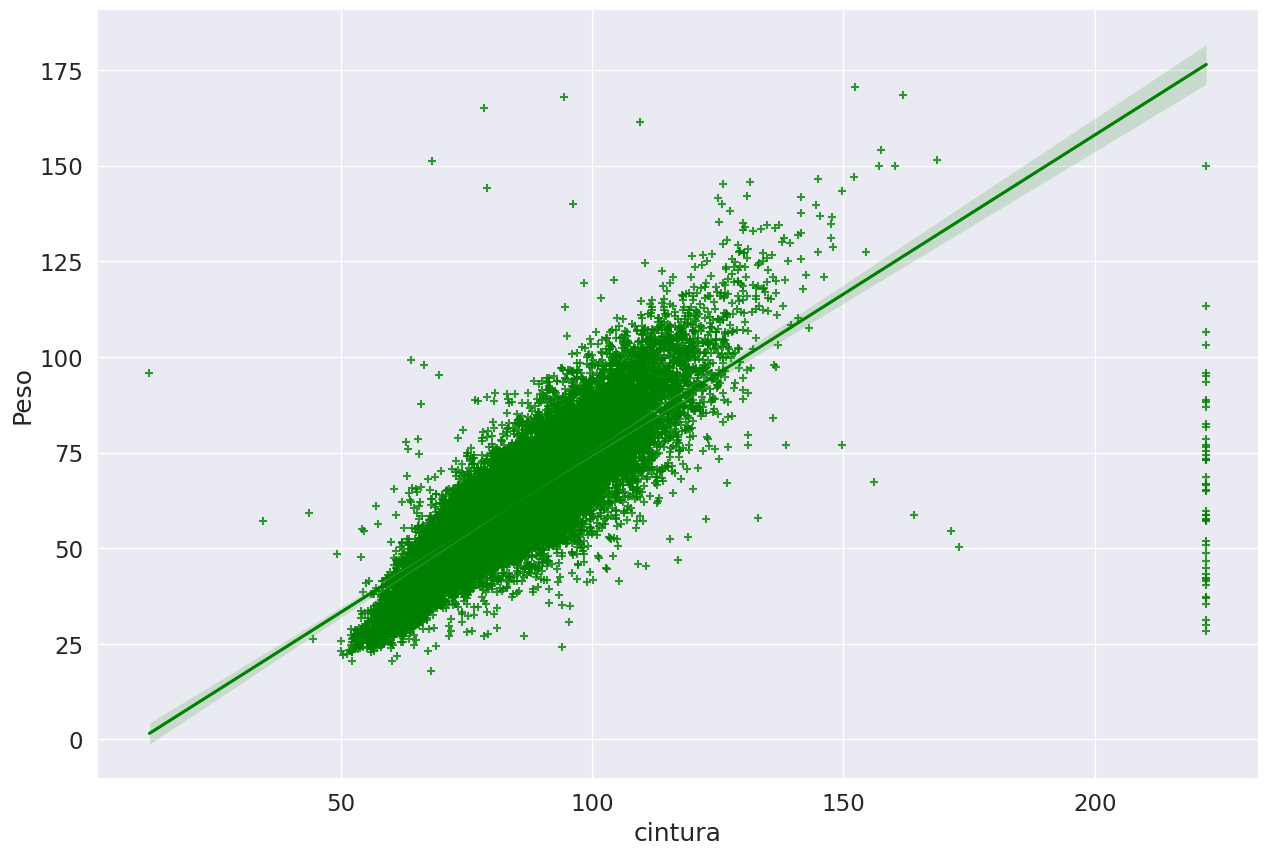

In [14]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
ax = sns.regplot(x="cintura", y="peso", data=data, color="green", marker="+")
ax.set(xlabel="cintura", ylabel="Peso")
plt.show()

In [15]:
resi = result.resid

In [16]:
resi

0        -0.062068
1        -9.256672
2         6.899685
3        -8.679342
4        12.296515
           ...    
18635     6.777867
18636    -7.979387
18637    -4.268694
18638   -15.751528
18639    -1.620382
Length: 18032, dtype: float64

In [17]:
resi.describe()

count    1.803200e+04
mean    -2.625288e-14
std      1.087726e+01
min     -1.481107e+02
25%     -5.776824e+00
50%     -1.303392e-01
75%      5.704138e+00
max      1.080356e+02
dtype: float64

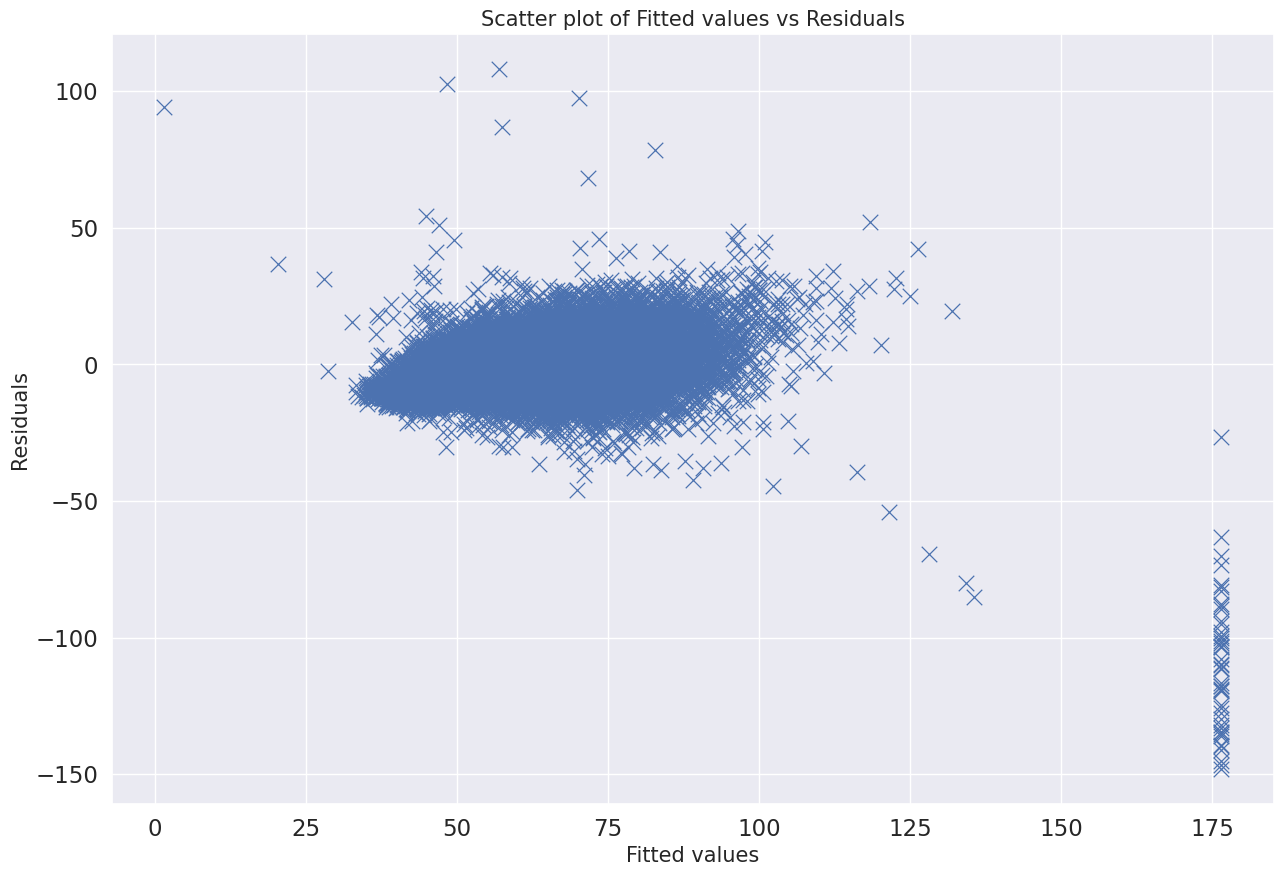

In [18]:
plt.figure(figsize=(15, 10))

pp = sns.scatterplot(x = result.fittedvalues,
                     y = resi,
                     marker='x',
                     s=125,#size of markers
                     #facecolor = 'b'
                    )



pp.set_xlabel("Fitted values", size = 15)
pp.set_ylabel("Residuals", size = 15)
pp.set_title("Scatter plot of Fitted values vs Residuals", size = 15)
plt.show()

##Separar por género

In [19]:
hombres = data[data['sexo'] == 1]
mujeres = data[data['sexo'] == 2]


y = pd.DataFrame(hombres['peso'])
x = pd.DataFrame(hombres['cintura'])
lm_hombres = linear_model.LinearRegression()
model_lm_hombres = lm.fit(x,y)
model_lm_hombres



LinearRegression()

In [20]:
print('The intercept is \t :\t',         model_lm_hombres.intercept_)
print('The coefficients are \t : \t',    model_lm_hombres.coef_)
print('Model score (R-squared) is : \t', model_lm_hombres.score(x, y))

The intercept is 	 :	 [-16.50145492]
The coefficients are 	 : 	 [[0.95577367]]
Model score (R-squared) is : 	 0.7126838925412646


In [21]:
y = pd.DataFrame(mujeres['peso'])
x = pd.DataFrame(mujeres['cintura'])
lm_mujeres = linear_model.LinearRegression()
model_lm_mujeres = lm.fit(x,y)
model_lm_mujeres

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print('The intercept is \t :\t',         model_lm_mujeres.intercept_)
print('The coefficients are \t : \t',    model_lm_mujeres.coef_)
print('Model score (R-squared) is : \t', model_lm_mujeres.score(x, y))

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.set(font_scale=1.5)
ax = sns.regplot(x="cintura", y="peso", data=hombres, color="green", marker="+")
ax.set(xlabel="Cintura", ylabel="Peso",title="Hombres")

plt.subplot(1,2,2)
sns.set(font_scale=1.5)
ax = sns.regplot(x="cintura", y="peso", data=mujeres, color="green", marker="+")
ax.set(xlabel="Cintura", ylabel="Peso", title="Mujeres")
plt.show()

In [ ]:
modelH = sm.OLS.from_formula("peso ~ cintura", data=hombres)
resultH = modelH.fit()
resultH.summary()

In [ ]:
modelM = sm.OLS.from_formula("peso ~ cintura", data=mujeres)
resultM = modelM.fit()
resultM.summary()

In [ ]:
resiH = resultH.resid
resiH

In [ ]:
resiH.describe()

In [ ]:
resiM = resultM.resid
resiM

In [ ]:
resiM.describe()

In [ ]:
plt.figure(figsize=(15, 10))

pp = sns.scatterplot(x = resultH.fittedvalues,
                     y = resiH,
                     marker='x',
                     s=125,#size of markers
                     #facecolor = 'b'
                    )



pp.set_xlabel("Fitted values", size = 15)
pp.set_ylabel("Residuals", size = 15)
pp.set_title("Scatter plot of Fitted values vs Residuals Men", size = 15)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))

pp = sns.scatterplot(x = resultM.fittedvalues,
                     y = resiM,
                     marker='x',
                     s=125,#size of markers
                     #facecolor = 'b'
                    )



pp.set_xlabel("Fitted values", size = 15)
pp.set_ylabel("Residuals", size = 15)
pp.set_title("Scatter plot of Fitted values vs Residuals Women", size = 15)
plt.show()

Estos resultados muestran que el modelo de regresión para predecir el peso a partir de la cintura difiere entre hombres y mujeres, con diferencias notables en la pendiente y el intercepto. Esto sugiere que la relación entre peso y cintura varía según el sexo.​​







In [ ]:
data.dropna(subset=['diastol', 'sistol'])
modelM = sm.OLS.from_formula("diastol ~ sistol", data=data)
resultM = modelM.fit()
resultM.summary()
